### Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)

### Load data

In [6]:
census = pd.read_csv("../../data/census/census_county.csv")

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (3220, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9,21.5,17.9,17.8,19.0,23.7,83.2,13.5,0.5,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2,28.5,14.1,23.9,13.5,19.9,84.9,11.2,0.4,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


### Quick look

Just by looking at 6 columns we can see a few things:

- Growing unemployment leads to poverty
- Poverty decreases with higher income
- Poverty encourages people to carpool
- Commuties that take Transit have longer commutes

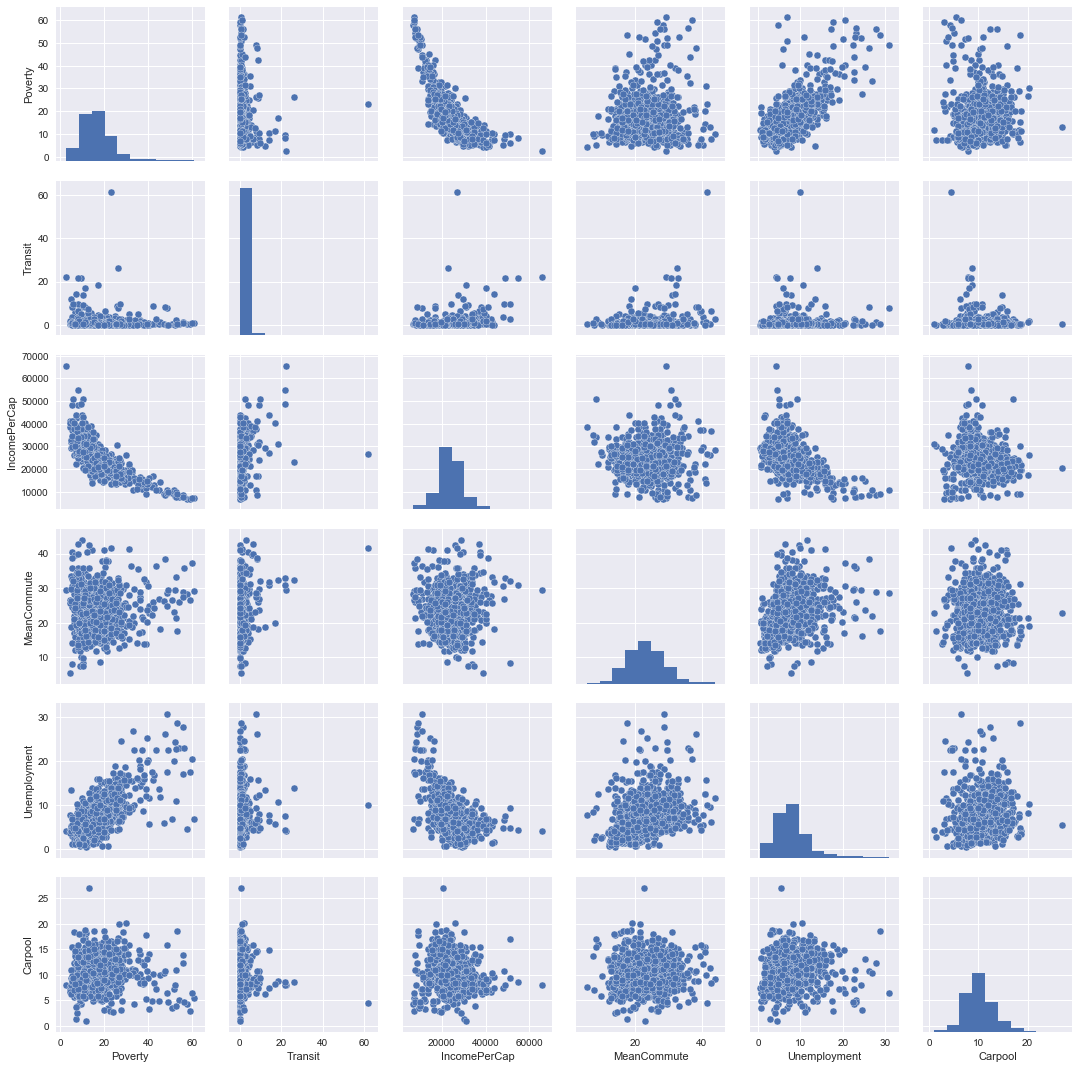

In [7]:
numeric_cols = ['Poverty', 'Transit', 'IncomePerCap', 'MeanCommute', 'Unemployment', "Carpool"]

_ = sns.pairplot(census[numeric_cols].sample(1000))

# Let's zoom in on a few of them

### Unemployment v. Poverty

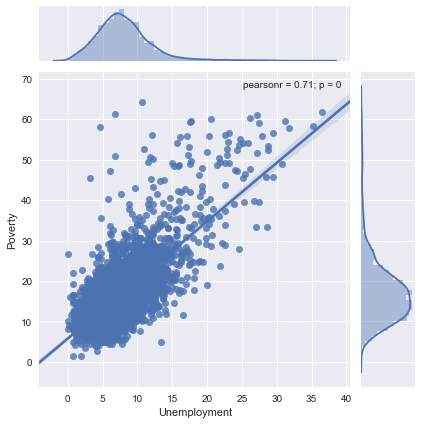

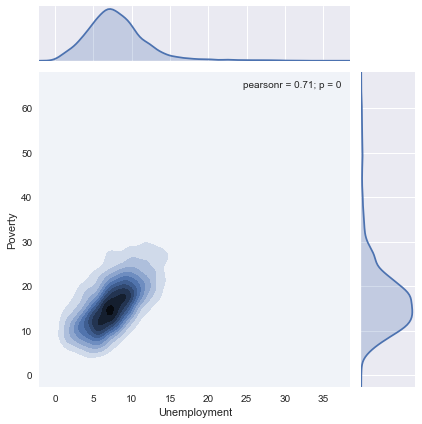

In [27]:
sns.jointplot(x='Unemployment', y='Poverty', data=census, kind="reg")
_ = sns.jointplot(x='Unemployment', y='Poverty', data=census, kind='kde')

### Poverty v. Income

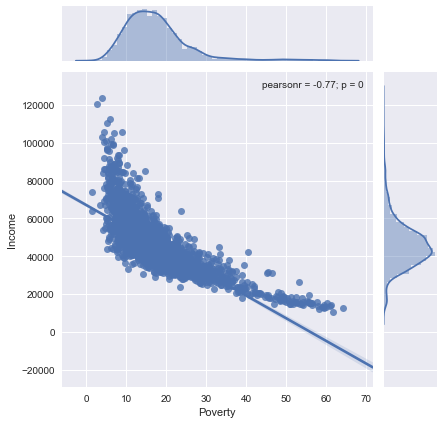

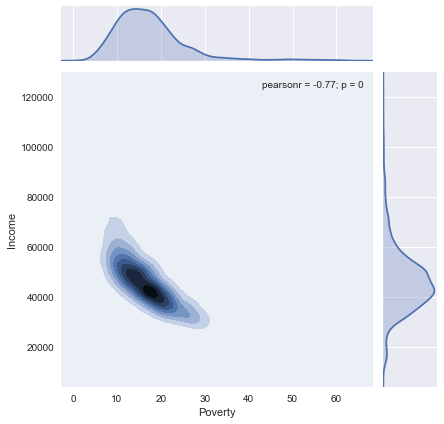

In [8]:
sns.jointplot(x='Poverty', y='Income', data=census, kind="reg")
_ = sns.jointplot(x='Poverty', y='Income', data=census, kind="kde")

### Poverty v. Carpool

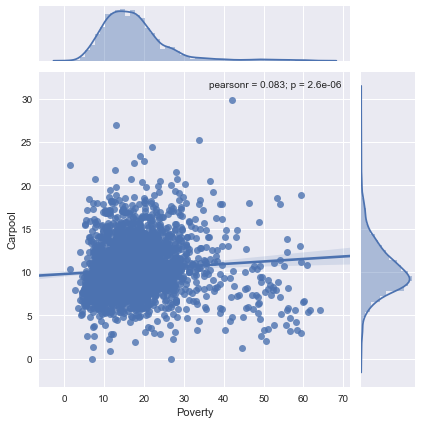

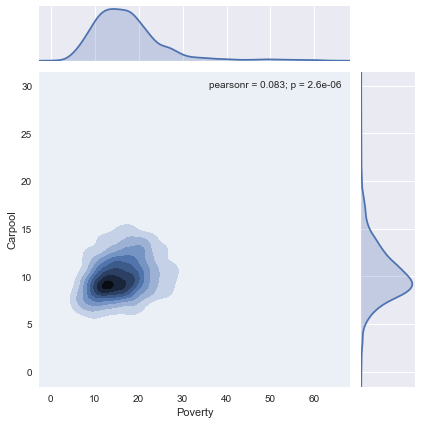

In [22]:
sns.jointplot(x='Poverty', y='Carpool', data=census, kind="reg")
_ = sns.jointplot(x='Poverty', y='Carpool', data=census, kind="kde")

### MeanCommute v. Transit

This plot is really helpful, from the pairplot I suspected a bigger relationship than what I see here

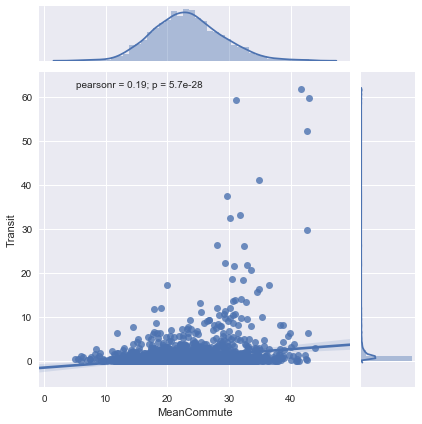

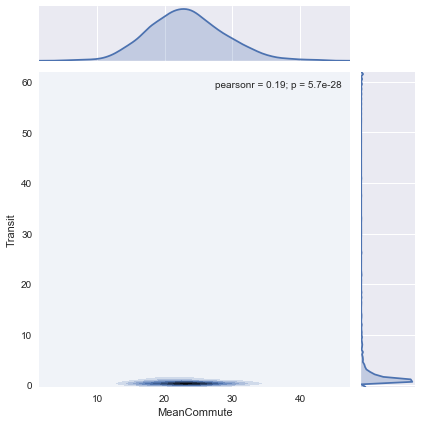

In [9]:
sns.jointplot(x='MeanCommute', y='Transit', data=census, kind="reg")
_ = sns.jointplot(x='MeanCommute', y='Transit', data=census, kind="kde")

### Income

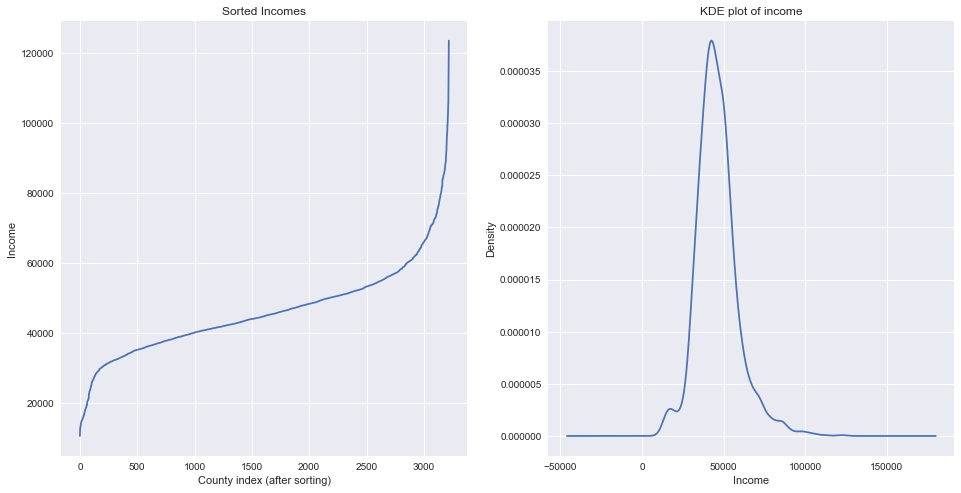

In [7]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))

income = census.groupby(["State", "County"])["Income"].median().sort_values().values
axarr[0].plot(income)
axarr[0].set(title="Sorted Incomes", xlabel="County index (after sorting)", ylabel="Income")

_ = (
        census
            .groupby(["State", "County"])["Income"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of income", xlabel="Income")
)

### Work based on income

Number of low income counties: 287   Number of middle income counties: 2863   Number of high income counties:  68


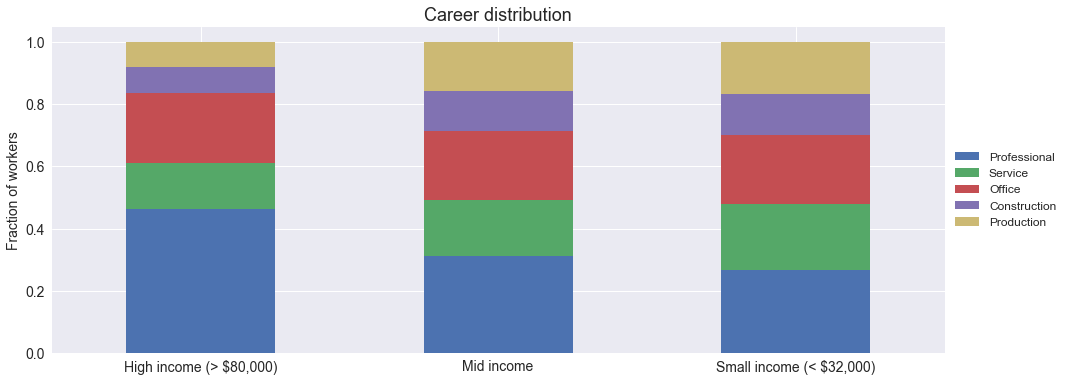

In [9]:
works = [ 'Professional', 'Service', 'Office', 'Construction','Production']

high_income = census[census.Income > 80000]
mid_income = census[(census.Income < 80000) & (census.Income > 32000)]
low_income  = census[census.Income < 32000]

print("Number of low income counties:", len(low_income),
      "  Number of middle income counties:", len(mid_income),
      "  Number of high income counties: ", len(high_income))

low = low_income[works].sum(axis=0)
low = low / low.sum()

mid = mid_income[works].sum(axis=0)
mid = mid / mid.sum()

high = high_income[works].sum(axis=0)
high = high / high.sum()

pd.DataFrame({
    "Small income (< $32,000)":  low,
    "Mid income":  mid,
    "High income (> $80,000)": high
}).transpose().plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of workers", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

_ = plt.title("Career distribution", fontsize=18)

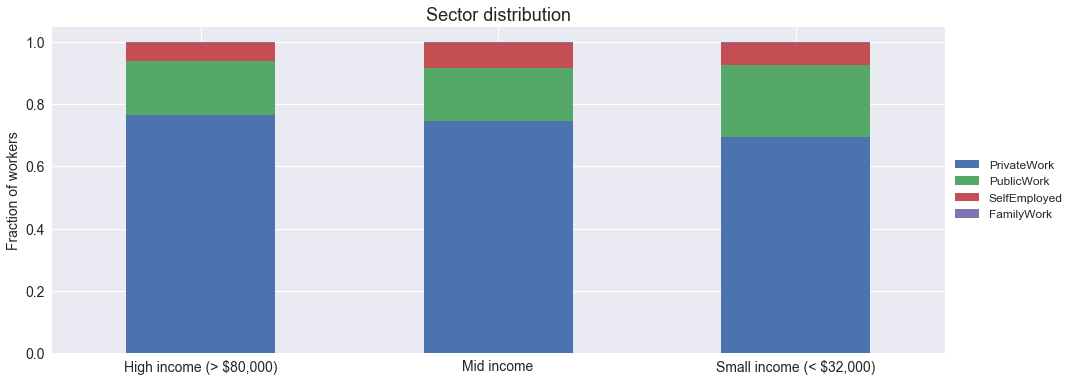

In [10]:
works = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

low = low_income[works].sum(axis=0)
low = low / low.sum()

mid = mid_income[works].sum(axis=0)
mid = mid / mid.sum()

high = high_income[works].sum(axis=0)
high = high / high.sum()

pd.DataFrame({
    "Small income (< $32,000)":  low,
    "Mid income":  mid,
    "High income (> $80,000)": high
}).transpose().plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of workers", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

_ = plt.title("Sector distribution", fontsize=18)

### Commute Times

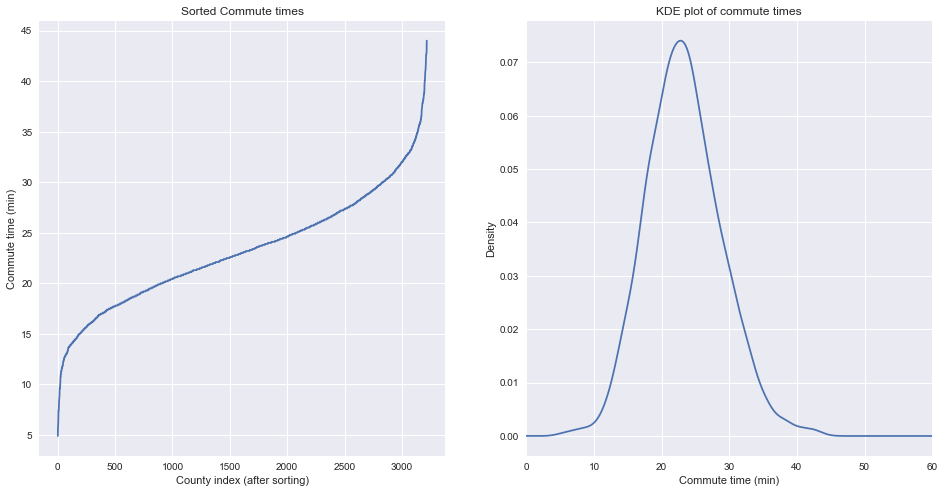

In [6]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))

commute_times = census.groupby(["State", "County"])["MeanCommute"].median().sort_values().values
axarr[0].plot(commute_times)
axarr[0].set(title="Sorted Commute times", xlabel="County index (after sorting)", ylabel="Commute time (min)")

_ = (
        census
            .groupby(["State", "County"])["MeanCommute"]
            .median()
            .sort_values()
            .plot(kind="kde", ax=axarr[1])
            .set(title="KDE plot of commute times", xlabel="Commute time (min)", xlim=(0,60))
)

### Commute times

Number of short commutes: 185   Number of average commutes: 2802   Number of long commutes:  211


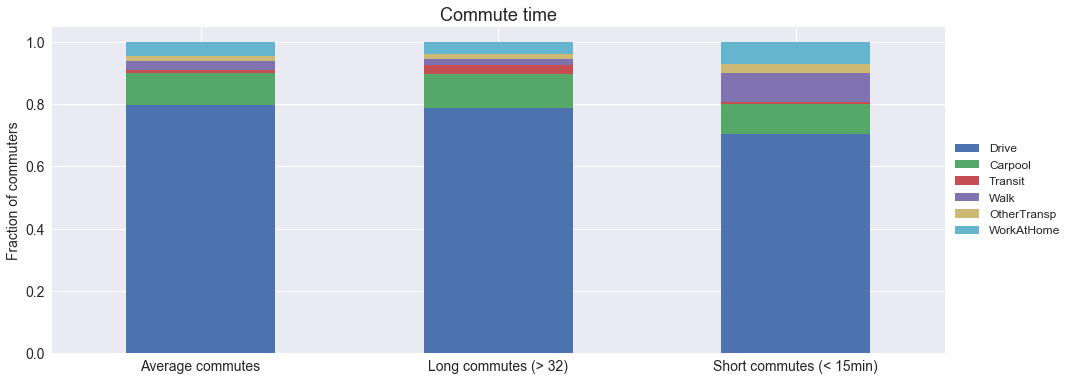

In [8]:
trans = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', "WorkAtHome"]

high_times = census[census.MeanCommute > 32]
mid_times = census[(census.MeanCommute < 32) & (census.MeanCommute > 15)]
low_times  = census[census.MeanCommute < 15]
print("Number of short commutes:", len(low_times),
      "  Number of average commutes:", len(mid_times),
      "  Number of long commutes: ", len(high_times))

low = low_times[trans].sum(axis=0)
low = low / low.sum()

mid = mid_times[trans].sum(axis=0)
mid = mid / mid.sum()

high = high_times[trans].sum(axis=0)
high = high / high.sum()

pd.DataFrame({
    "Short commutes (< 15min)":  low,
    "Average commutes":  mid,
    "Long commutes (> 32)": high
}).transpose().plot(kind="bar", rot=0, stacked=True, fontsize=14, figsize=(16, 6))

plt.ylabel("Fraction of commuters", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)

_ = plt.title("Commute time", fontsize=18)